In [7]:
import os
import requests
import json
import numpy as np
from dotenv import load_dotenv
from pathlib import Path
import pandas as pd
from coinapi_rest_v1.restapi import CoinAPIv1
import datetime, sys

#For Heatmap:
import seaborn as sns
%matplotlib inline

In [8]:
crypto_data_2017 = pd.read_csv(
    Path('./2017_crypto.csv')
)

In [9]:
crypto_data_2017.head()

,time,btc_price_close,eth_price_close,ltc_price_close,usdt_price_close,xlm_start_date,price_open,xlm_price_close,xrp_price_close,zec_price_close,dash_price_close
0,2017-01-01T00:00:00.0000000Z,969.739,10.66911,4.12475,0.0000,2017-01-01T00:00:00.0000000Z,0.002250,0.002149,0.000000,39.72103,0.00000
1,2017-02-01T00:00:00.0000000Z,1180.000,15.63000,3.77000,0.0000,2017-02-01T00:00:00.0000000Z,0.002298,0.001920,0.000000,36.87479,0.00000
2,2017-03-01T00:00:00.0000000Z,1079.780,49.69750,7.07063,0.0000,2017-03-01T00:00:00.0000000Z,0.001833,0.002282,0.000000,62.22333,0.00000
3,2017-04-01T00:00:00.0000000Z,1350.717,78.36700,15.65775,0.9350,2017-04-01T00:00:00.0000000Z,0.002278,0.004805,0.000000,92.72201,92.82983
4,2017-05-01T00:00:00.0000000Z,2291.301,228.50000,25.78000,1.0571,2017-05-01T00:00:00.0000000Z,0.004805,0.034000,0.249367,231.36099,137.37001


In [10]:
crypto_data_2017.drop(columns = ['xlm_start_date'])

,time,btc_price_close,eth_price_close,ltc_price_close,usdt_price_close,price_open,xlm_price_close,xrp_price_close,zec_price_close,dash_price_close
0,2017-01-01T00:00:00.0000000Z,969.739,10.66911,4.12475,0.0000,0.002250,0.002149,0.000000,39.72103,0.00000
1,2017-02-01T00:00:00.0000000Z,1180.000,15.63000,3.77000,0.0000,0.002298,0.001920,0.000000,36.87479,0.00000
2,2017-03-01T00:00:00.0000000Z,1079.780,49.69750,7.07063,0.0000,0.001833,0.002282,0.000000,62.22333,0.00000
3,2017-04-01T00:00:00.0000000Z,1350.717,78.36700,15.65775,0.9350,0.002278,0.004805,0.000000,92.72201,92.82983
4,2017-05-01T00:00:00.0000000Z,2291.301,228.50000,25.78000,1.0571,0.004805,0.034000,0.249367,231.36099,137.37001
5,2017-06-01T00:00:00.0000000Z,2445.000,280.00000,39.04784,1.0061,0.034000,0.026694,0.244035,294.79606,174.73788
6,2017-07-01T00:00:00.0000000Z,2876.133,201.77770,42.34721,1.0025,0.026505,0.016269,0.165100,174.00000,178.50000
7,2017-08-01T00:00:00.0000000Z,4737.270,388.00300,73.37080,1.0046,0.000000,0.000000,0.260000,290.00000,387.18200
8,2017-09-01T00:00:00.0000000Z,4344.000,302.20000,55.65000,0.9998,0.000000,0.000000,0.199030,277.00000,330.00000
9,2017-10-01T00:00:00.0000000Z,6430.500,304.12000,55.47000,0.9999,0.000000,0.000000,0.199060,234.00000,279.38000


In [25]:
crypto_data_2017

,time,btc_price_close,eth_price_close,ltc_price_close,usdt_price_close,xlm_start_date,price_open,xlm_price_close,xrp_price_close,zec_price_close,dash_price_close
0,2017-01-01T00:00:00.0000000Z,969.739,10.66911,4.12475,0.0000,2017-01-01T00:00:00.0000000Z,0.002250,0.002149,0.000000,39.72103,0.00000
1,2017-02-01T00:00:00.0000000Z,1180.000,15.63000,3.77000,0.0000,2017-02-01T00:00:00.0000000Z,0.002298,0.001920,0.000000,36.87479,0.00000
2,2017-03-01T00:00:00.0000000Z,1079.780,49.69750,7.07063,0.0000,2017-03-01T00:00:00.0000000Z,0.001833,0.002282,0.000000,62.22333,0.00000
3,2017-04-01T00:00:00.0000000Z,1350.717,78.36700,15.65775,0.9350,2017-04-01T00:00:00.0000000Z,0.002278,0.004805,0.000000,92.72201,92.82983
4,2017-05-01T00:00:00.0000000Z,2291.301,228.50000,25.78000,1.0571,2017-05-01T00:00:00.0000000Z,0.004805,0.034000,0.249367,231.36099,137.37001
5,2017-06-01T00:00:00.0000000Z,2445.000,280.00000,39.04784,1.0061,2017-06-01T00:00:00.0000000Z,0.034000,0.026694,0.244035,294.79606,174.73788
6,2017-07-01T00:00:00.0000000Z,2876.133,201.77770,42.34721,1.0025,2017-07-01T00:00:00.0000000Z,0.026505,0.016269,0.165100,174.00000,178.50000
7,2017-08-01T00:00:00.0000000Z,4737.270,388.00300,73.37080,1.0046,2017-08-01T00:00:00.0000000Z,0.000000,0.000000,0.260000,290.00000,387.18200
8,2017-09-01T00:00:00.0000000Z,4344.000,302.20000,55.65000,0.9998,2017-09-01T00:00:00.0000000Z,0.000000,0.000000,0.199030,277.00000,330.00000
9,2017-10-01T00:00:00.0000000Z,6430.500,304.12000,55.47000,0.9999,2017-10-01T00:00:00.0000000Z,0.000000,0.000000,0.199060,234.00000,279.38000


In [26]:
# Monthly Returns

btc_monthly_returns = crypto_data_2017['btc_price_close'].pct_change().dropna()
eth_monthly_returns = crypto_data_2017['eth_price_close'].pct_change().dropna()
usdt_monthly_returns = crypto_data_2017['usdt_price_close'].pct_change().dropna()
ltc_monthly_returns = crypto_data_2017['ltc_price_close'].pct_change().dropna()
xlm_monthly_returns = crypto_data_2017['xlm_price_close'].pct_change().dropna()
xrp_monthly_returns = crypto_data_2017['xrp_price_close'].pct_change().dropna()
zec_monthly_returns = crypto_data_2017['zec_price_close'].pct_change().dropna()
dash_monthly_returns = crypto_data_2017['dash_price_close'].pct_change().dropna()


In [33]:
mothly_returns_crypto = pd.concat([btc_monthly_returns,eth_monthly_returns,usdt_monthly_returns,ltc_monthly_returns,xlm_monthly_returns,xrp_monthly_returns,zec_monthly_returns,dash_monthly_returns], axis=1)

In [35]:
monthly_returns_crypto.rename(columns = {'btc_price_close_btc':'btc_monthly_returns','eth_price_close': 'eth_monthly_returns','ltc_price_close':'ltc_monthly_returns','xlm_price_close':'xlm_monthly_returns','xrp_price_close':'xrp_monthly_returns','zec_price_close':'zec_monthly_returns','usdt_price_close':'usdt_monthly_returns','dash_price_close':'dash_monthly_returns'})

NameError: name 'monthly_returns_crypto' is not defined

In [52]:
#BTC VARIANCE
# ASSIGN TO MARKET VARIANCE
market_var = final_2017_df['BTC_Monthly_Close'].var()
market_var

16502603.084500002

In [53]:
market_cov = final_2017_df['BTC_Monthly_Close'].cov(final_2017_df['BTC_Monthly_Close'])

In [54]:
# there's definitely a more efficient way to do this
eth_cov = final_2017_df['ETH_Monthly_Close'].cov(final_2017_df['BTC_Monthly_Close'])
ltc_cov = final_2017_df['LTC_Monthly_Close'].cov(final_2017_df['BTC_Monthly_Close'])
usdt_cov = final_2017_df['USDT_Monthly_Close'].cov(final_2017_df['BTC_Monthly_Close'])
xlm_cov = final_2017_df['XLM_Monthly_Close'].cov(final_2017_df['BTC_Monthly_Close'])
xrp_cov = final_2017_df['XRP_Monthly_Close'].cov(final_2017_df['BTC_Monthly_Close'])
dash_cov = final_2017_df['DASH_Monthly_Close'].cov(final_2017_df['BTC_Monthly_Close'])
zec_cov = final_2017_df['ZEC_Monthly_Close'].cov(final_2017_df['BTC_Monthly_Close'])


In [55]:
print(eth_cov)
print(ltc_cov)
print(usdt_cov)
print(xlm_cov)
print(xrp_cov)
print(dash_cov)
print(zec_cov)

801315.4926763128
236600.96898120275
26.031457736363528
101.81909876436364
1804.7523289700912
1253520.4897922475
454730.6912678437


In [56]:
# covariance list
covariance_list = [market_cov, eth_cov, ltc_cov, usdt_cov, xlm_cov, xrp_cov, dash_cov, zec_cov]

In [57]:
covariance_list

[16502603.084500002,
 801315.4926763128,
 236600.96898120275,
 26.031457736363528,
 101.81909876436364,
 1804.7523289700912,
 1253520.4897922475,
 454730.6912678437]

In [59]:
# BETA
"""
beta = cov of asset to market / variance of market """

btc_beta = market_cov / market_var
eth_beta = eth_cov / market_var
ltc_beta = ltc_cov / market_var
usdt_beta = usdt_cov / market_var
xlm_beta = xlm_cov / market_var
xrp_beta = xrp_cov / market_var
dash_beta = dash_cov / market_var
zec_beta = zec_cov / market_var

In [60]:
Beta_list = [btc_beta, eth_beta, ltc_beta, usdt_beta, xlm_beta, xrp_beta, dash_beta, zec_beta]

Beta_list

[1.0,
 0.04855691484387362,
 0.01433719079164118,
 1.5774152479503952e-06,
 6.169881093486202e-06,
 6.62693487055281e-12,
 0.07595895528564285,
 0.027555088669311056]

<AxesSubplot:>

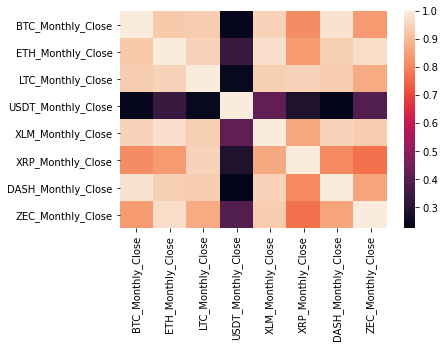

In [61]:
correlation = final_2017_df.corr()
sns.heatmap(correlation)